# 03. Plotting with Pandas

### Objectives
1. Plot directly with a DataFrame or Series object with the **`plot`** method


### Resources
1. [Pandas Visualization documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

# Plotting in Pandas
Pandas makes plotting quite easy by automating much of the procedure for you. All pandas plotting passes through Python's main visualization library, **matplotlib** and is accessed through the DataFrame.plot or Series.plot method. We say that the pandas plot method is a 'wrapper' for matplotlib.

For plots to be embedded in the notebook, you must run the magic command **`%matplotlib inline`**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline 

In [9]:
req = requests.get('https://api.iextrading.com/1.0/stock/AMZN/chart/5y')
amzn = pd.read_json(req.text)
amzn.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-1.860,0.000000,-0.624,296.060,2013-09-16,301.00,"Sep 16, 13",295.2600,299.82,1818071,1818071,297.3871
1,8.110,0.027393,2.739,304.170,2013-09-17,304.65,"Sep 17, 13",296.0101,297.63,2297156,2297156,302.4460
2,7.864,0.053955,2.585,312.034,2013-09-18,312.74,"Sep 18, 13",302.9100,304.06,2946338,2946338,308.3939
3,0.026,0.054043,0.008,312.060,2013-09-19,314.54,"Sep 19, 13",311.0400,313.77,2350946,2350946,313.0844
4,4.280,0.068500,1.372,316.340,2013-09-20,320.57,"Sep 20, 13",312.4100,312.54,5302279,5302279,316.2636


In [10]:
req.status_code

200

In [11]:
req.text

'[{"date":"2013-09-16","open":299.82,"high":301,"low":295.26,"close":296.06,"volume":1818071,"unadjustedVolume":1818071,"change":-1.86,"changePercent":-0.624,"vwap":297.3871,"label":"Sep 16, 13","changeOverTime":0},{"date":"2013-09-17","open":297.63,"high":304.65,"low":296.0101,"close":304.17,"volume":2297156,"unadjustedVolume":2297156,"change":8.11,"changePercent":2.739,"vwap":302.446,"label":"Sep 17, 13","changeOverTime":0.027393095994055306},{"date":"2013-09-18","open":304.06,"high":312.74,"low":302.91,"close":312.034,"volume":2946338,"unadjustedVolume":2946338,"change":7.864,"changePercent":2.585,"vwap":308.3939,"label":"Sep 18, 13","changeOverTime":0.05395527933526984},{"date":"2013-09-19","open":313.77,"high":314.54,"low":311.04,"close":312.06,"volume":2350946,"unadjustedVolume":2350946,"change":0.026,"changePercent":0.008,"vwap":313.0844,"label":"Sep 19, 13","changeOverTime":0.05404309937174897},{"date":"2013-09-20","open":312.54,"high":320.57,"low":312.41,"close":316.34,"volume

In [12]:
amzn = amzn.set_index('date')
amzn_close = amzn['close']
amzn_close.head()

date
2013-09-16    296.060
2013-09-17    304.170
2013-09-18    312.034
2013-09-19    312.060
2013-09-20    316.340
Name: close, dtype: float64

## Plotting a Series
Pandas uses the Series index as the x-values and the values as y-values. By default, Pandas creates a line plot. Let's plot Amazon's closing price for the last 5 years.

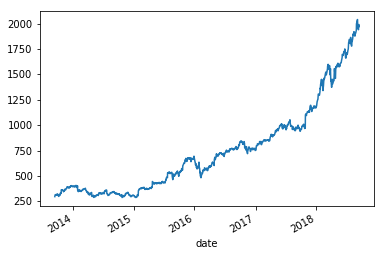

In [13]:
amzn_close.plot()

Get data from Apple, Facebook, Schlumberger and Tesla since beginning of 2014

In [14]:
symbols = ['AAPL', 'FB', 'SLB', 'TSLA']

In [15]:
stock_dict = {'AMZN': amzn_close}
for symbol in symbols:
    req = requests.get(f'https://api.iextrading.com/1.0/stock/{symbol}/chart/5y')
    stock = pd.read_json(req.text).set_index('date')
    stock_dict[symbol] = stock['close']

In [16]:
df_stocks = pd.DataFrame(stock_dict)
df_stocks.head()

,AMZN,AAPL,FB,SLB,TSLA
date,,,,,
2013-09-16,296.060,58.8776,42.51,77.0255,166.580
2013-09-17,304.170,59.5577,45.07,77.6806,166.230
2013-09-18,312.034,60.7821,45.23,78.7519,166.218
2013-09-19,312.060,61.7788,45.98,78.6103,177.920
2013-09-20,316.340,61.1392,47.49,77.4150,183.390


## Plot all Series one at a time
All calls to plot that happen in the same cell will be drawn on the same Axes unless otherwise specified.

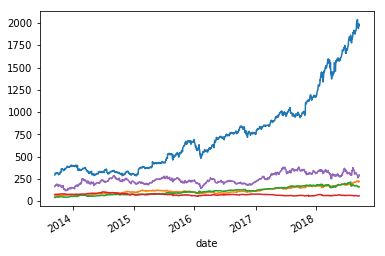

In [17]:
df_stocks['AMZN'].plot()
df_stocks['AAPL'].plot()
df_stocks['FB'].plot()
df_stocks['SLB'].plot()
df_stocks['TSLA'].plot()

## Plot all all at once from the DataFrame
Instead of individually plotting Series, we can plot each column in the DataFrame at once with its **`plot`** method.

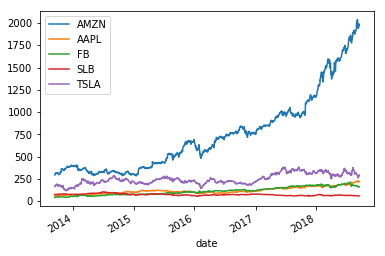

In [18]:
df_stocks.plot()

# Plotting in Pandas is Column based
The most important thing to know about plotting in pandas is that it is **column based**. Pandas plots each column, one at a time. It uses the index as the x-values for each column and the values of each column as the y-values.

## Choosing other types of plots
Pandas directly uses Matplotlib for all of its plotting. Pandas does not have any plotting capabilities on its own. Pandas is simply calling Matplotlib's plotting functions and filling the arguments in those plotting functions for you. The types of available plots are available in [visualization section of the docs][1] and set with the argument **`kind`**

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot

[1]: http://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots

### Histogram of the closing prices of Apple

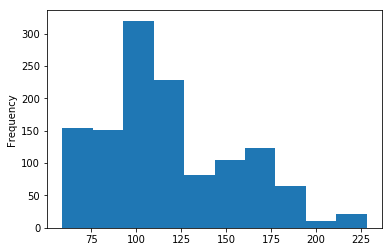

In [19]:
# Lets create a histogram of a Series
aapl = df_stocks['AAPL']
aapl.plot(kind='hist')

### Kernel Density Estimate
Very similar to a histogram, shows the approximate probability as area under the curve.

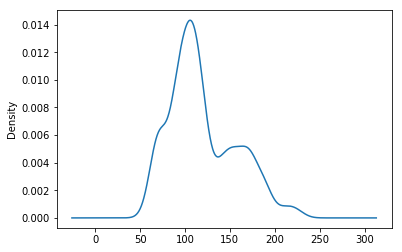

In [20]:
aapl.plot('kde');

## Additional Plotting Arguments
To modify your plots to your liking, matplotlib gives you lots of power. The most commonly used arguments are listed below but thre are [lots more](http://matplotlib.org/api/pyplot_api.html)

* **`linestyle`** (ls) - Pass a string of one of the following ['--', '-.', '-', ':']
* **`color`** (c) - Can take a string of a named color, a string of the hexadecimal characters or a rgb tuple with each number between 0 and 1. [Check out this really good stackoverflow post to see the colors](http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
* **`linewidth`** (lw) - controls thickness of line. Default is 1
* **`alpha`** - controls opacity with a number between 0 and 1
* **`figsize`** - a tuple used to control the size of the plot. (width, height) 
* **`legend`** - boolean to control legend

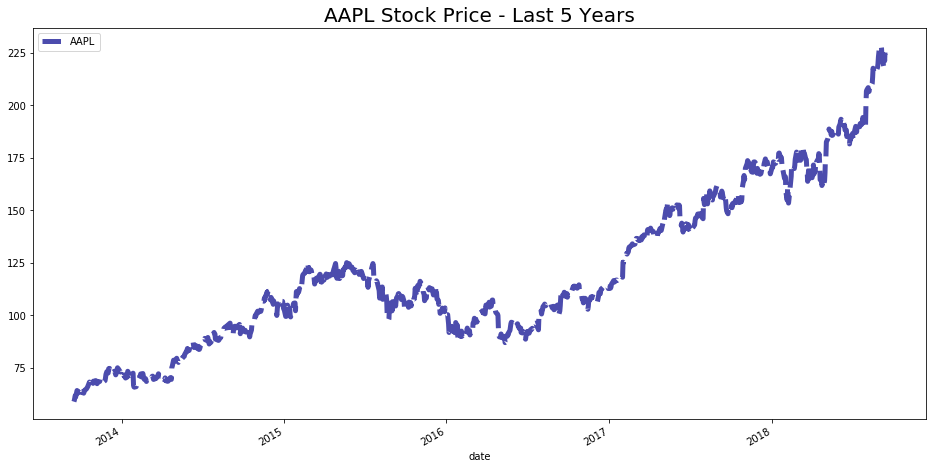

In [21]:
# Use several of the additional plotting arguemnts
aapl.plot(color="darkblue", 
          linestyle='--', 
          figsize=(16, 8), 
          linewidth=5, 
          alpha=.7, 
          legend=True)

#add a title
plt.title("AAPL Stock Price - Last 5 Years", fontsize=20);

# Plots still Ugly?
If you can't get a plot to look how you would like, you can freely choose from several predefined layouts. These layouts can instantly make your plots more attractive. You set these styles in matplotlib.

In [22]:
# lets look at some styles we can choose from
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [99]:
# lets use a popular style - ggplot
plt.style.use('dark_background')
plt.rcdefaults()

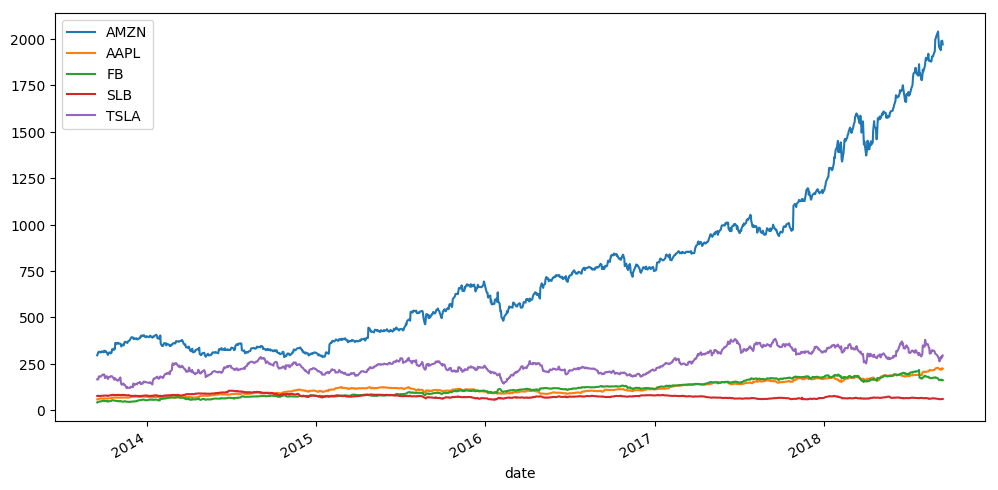

In [100]:
df_stocks.plot(figsize=(12, 6))

## New Dataset
A popular intro dataset for the famous **`ggplot2`** package in R is the diamonds dataset with [description here.](http://docs.ggplot2.org/0.9.3.1/diamonds.html)

In [25]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Changing the defaults for a scatterplot

The default plot is a line plot and uses the index as the x-axis. Each column of the frame become the y-values. This worked well for stock price data where the date was in the index and ordered. For many datasets, you will have to explicitly set the x and y axis variables. Below is a scatterplot comparison of carat vs price.

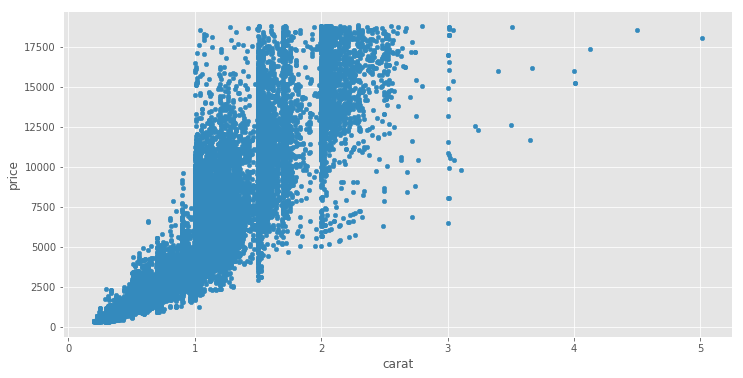

In [26]:
diamonds.plot('carat', 'price', kind='scatter', figsize=(12, 6));

In [27]:
diamonds.shape

(53940, 10)

## Sample the data when too many points

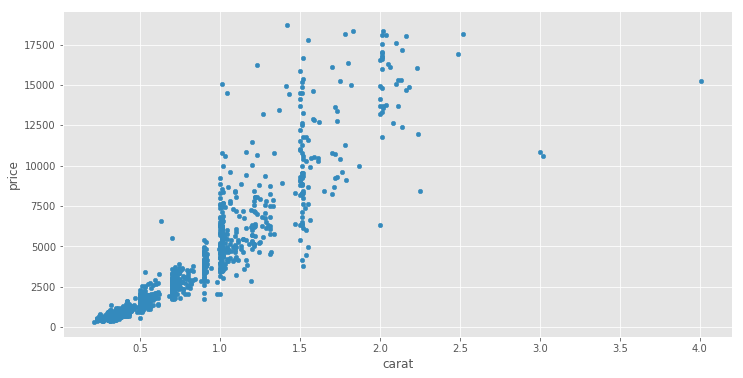

In [28]:
diamonds.sample(frac=.02).plot('carat', 'price', kind='scatter', figsize=(12, 6));

# If you have tidy data, use `groupby/pivot_table`, then make a bar plot
If your data is tidy like it is with this diamonds dataset, you will likely need to aggregate it with either a `groupby` or a `pivot_table` to make it work with a bar plot.

### The index becomes the tick labels for String Indexes
Pandas nicely integrates the index into plotting by using it as the tick mark labels for many plots.

In [29]:
cut_count = diamonds['cut'].value_counts()
cut_count

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

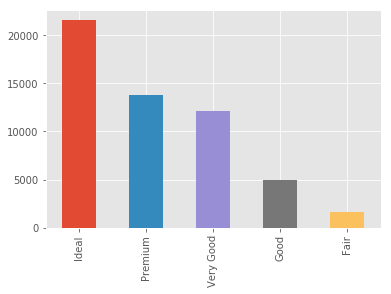

In [30]:
cut_count.plot(kind='bar')

### More than one grouping column in the index

In [31]:
# bar plot with more than one category
cut_color_count = diamonds.groupby(['cut', 'color']).size()
cut_color_count.head(10)

cut   color
Fair  D        163
      E        224
      F        312
      G        314
      H        303
      I        175
      J        119
Good  D        662
      E        933
      F        909
dtype: int64

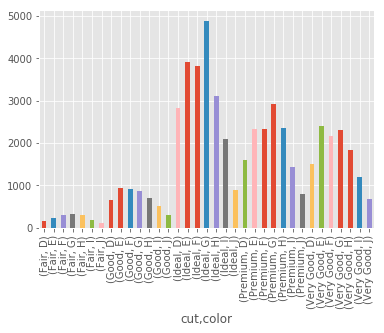

In [32]:
cut_color_count.plot(kind='bar')

## Thats quite ugly
Let's reshape and plot again.

In [33]:
cut_color_pivot = diamonds.pivot_table(index='cut', columns='color', aggfunc='size')
cut_color_pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


Plot the whole DataFrame. The index always goes on the x-axis. Each column value is the y-value and the column names are used as labels in the legend.

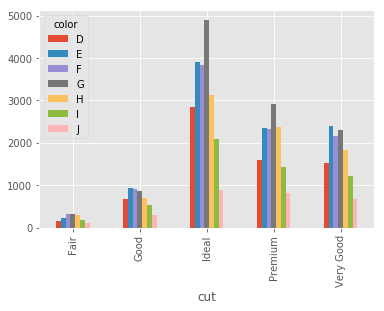

In [34]:
cut_color_pivot.plot(kind='bar')

## Pandas plots return matplotlib objects
After making a plot with pandas, you will see some text output immediately under the cell that was just executed. Pandas is returning to us the matplotlib Axes object. You can assign the result of the **`plot`** method to a variable.

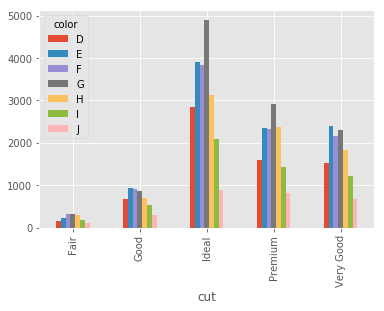

In [35]:
ax = cut_color_pivot.plot(kind='bar')

In [36]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

Get the figure as an attribute of the Axes

In [37]:
fig = ax.figure

In [38]:
type(fig)

matplotlib.figure.Figure

# We can use the figure and axes as normal

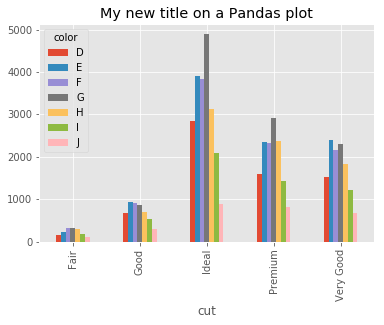

In [39]:
ax.set_title('My new title on a Pandas plot')
fig

### Problem 1
<span  style="color:green; font-size:16px">In this problem we will test whether daily returns from stocks are normally distributed. Complete the following tasks:
* Take the `df_stocks` DataFrame and call the **`pct_change`** method to get the daily return percentage and assign it to a variable. 
* Assign the mean and standard deviation of each column (these will return Series) to separate variables. 
* Standardize your columns by subtracting the mean and dividing by the standard deviation. You have now produced a **z-score** for each daily return. 
* Add a column to this DataFrame called **`noise`** by calling **`np.random.randn`** which creates random normal variables.
* Plot the KDE for each column in your DataFrame. If the stock returns are normal, then the shapes of the curves will all look the same.
* Limit the xaxis to be between -3 and 3.
* Are stock retunrs normally distributed?</span>

### Problem 2
<span  style="color:green; font-size:16px">Use Pandas to plot a horizontal bar plot of diamond cuts.</span>

### Problem 3
<span  style="color:green; font-size:16px">Make a visualization that easily shows the differences in average salary by gender for each department of the employee dataset.</span>

### Problem 4
<span  style="color:green; font-size:16px">Split the employee data into two separate DataFrames. Those who have a hire date after the year 2000 and those who have one before. Make the same plot above for each group.</span>

In [70]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])
emp.head()

,title,dept,salary,race,gender,hire_date,job_date
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22


In [76]:
emp_filt1 = emp['hire_date']

In [77]:
emp_filt1 = emp_filt1.dt.year >= 2000

In [79]:
emp_2000_later = emp[emp_filt1]
emp_2000_later.head()

,title,dept,salary,race,gender,hire_date,job_date
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03
6,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26,2012-03-26
7,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04,2013-11-04


In [84]:
emp_2000_later = emp_2000_later.pivot_table(index='dept', columns='gender', values='salary')


KeyError: 'salary'

In [86]:
emp_2000_later.head()

gender,Female,Male
dept,,
Admn. & Regulatory Affairs,48154.777778,57592.285714
City Controller's Office,57306.500000,42640.000000
City Council,59260.000000,58491.500000
Convention and Entertainment,38397.000000,NaN
Dept of Neighborhoods (DON),51124.000000,34245.200000


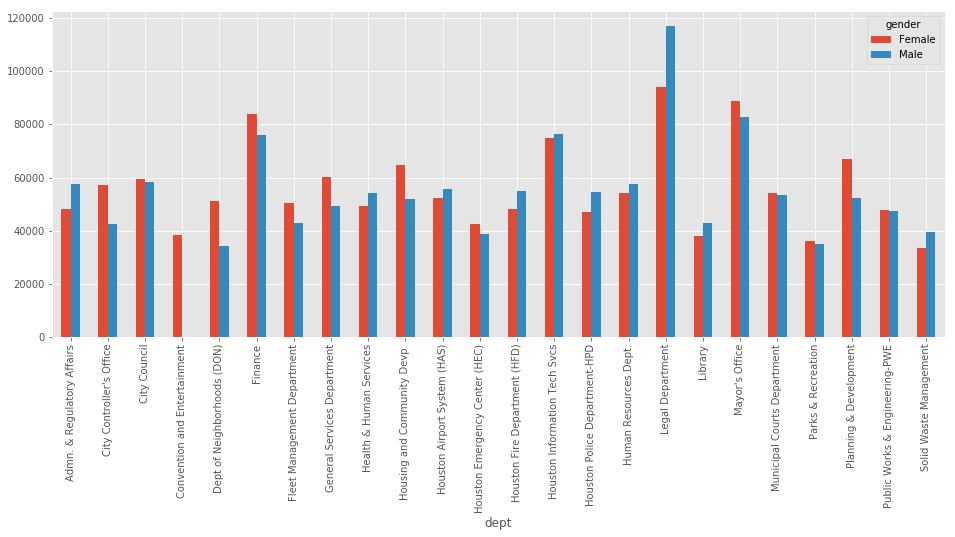

In [88]:
emp_2000_later.plot(kind='bar', figsize=(16,6))

In [89]:
emp_2000_before = emp[~emp_filt1]

In [93]:
emp_2000_before = emp_2000_before.pivot_table(index='dept',
                            columns='gender',
                            values='salary')


KeyError: 'salary'

In [95]:
emp_2000_before.head()

gender,Female,Male
dept,,
Admn. & Regulatory Affairs,51473.5,NaN
City Controller's Office,60652.5,NaN
Dept of Neighborhoods (DON),50031.0,56183.250000
Finance,81458.0,78395.333333
Fleet Management Department,54363.5,43730.777778


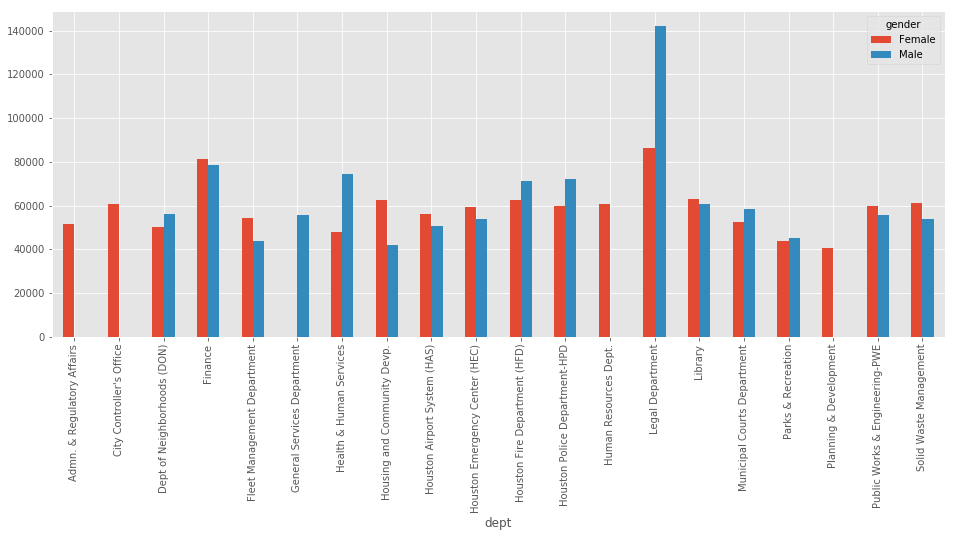

In [96]:
emp_2000_before.plot(kind='bar',figsize=(16, 6))

### Problem 5
<span  style="color:green; font-size:16px">Use the **`flights`** data set. Plot the counts of the number of flights per day of week.</span>

In [64]:
weekday_flight_count = flights['day_of_week'].value_counts()
weekday_flight_count

1    8720
3    8706
4    8659
2    8535
5    8453
7    8367
6    7052
Name: day_of_week, dtype: int64

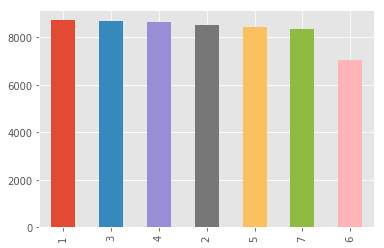

In [67]:
weekday_flight_count.plot(kind='bar')

### Problem 6
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week.</span>

In [55]:
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,WN,1908,N8324A,LAX,SLC,1625,...,2010.0,65.0,0,0,NaN,31.0,0.0,0.0,34.0,0.0
1,2015,1,1,4,UA,581,N448UA,DEN,IAD,823,...,1320.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,MQ,2851,N645MQ,DFW,VPS,1305,...,1528.0,35.0,0,0,NaN,0.0,0.0,35.0,0.0,0.0
3,2015,1,1,4,AA,383,N3EUAA,DFW,DCA,1555,...,1928.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,WN,3047,N560WN,LAX,MCI,1720,...,2304.0,39.0,0,0,NaN,0.0,0.0,17.0,22.0,0.0


In [57]:
weekday_delay = flights.groupby('day_of_week').agg({'arrival_delay':'mean'})
weekday_delay

,arrival_delay
day_of_week,
1,7.920024
2,5.004644
3,5.560541
4,7.133966
5,5.691994
6,3.057856
7,5.796170


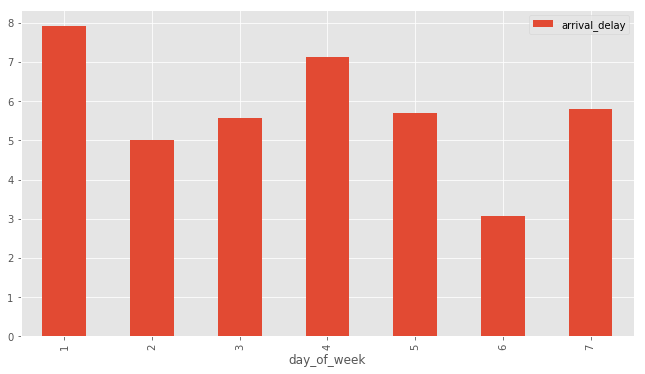

In [61]:
weekday_delay.plot(kind='bar', figsize=(11,6))

### Problem 7
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week per airline.</span>

In [45]:
flights = pd.read_csv('../data/flights.csv')
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,WN,1908,N8324A,LAX,SLC,1625,...,2010.0,65.0,0,0,NaN,31.0,0.0,0.0,34.0,0.0
1,2015,1,1,4,UA,581,N448UA,DEN,IAD,823,...,1320.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,MQ,2851,N645MQ,DFW,VPS,1305,...,1528.0,35.0,0,0,NaN,0.0,0.0,35.0,0.0,0.0
3,2015,1,1,4,AA,383,N3EUAA,DFW,DCA,1555,...,1928.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,WN,3047,N560WN,LAX,MCI,1720,...,2304.0,39.0,0,0,NaN,0.0,0.0,17.0,22.0,0.0


In [48]:
airline_weekday_delay = flights.pivot_table(index='airline', columns='day_of_week', values='arrival_delay')
airline_weekday_delay.head()

day_of_week,1,2,3,4,5,6,7
airline,,,,,,,
AA,9.135772,3.009053,2.979561,6.474771,6.743017,5.720548,4.869800
AS,1.152542,-3.783019,-3.782609,5.181818,-1.284404,-2.650485,-0.906542
B6,11.057143,9.474359,3.564103,13.678571,4.285714,4.966102,12.655172
DL,1.155868,1.126724,1.097608,2.990266,-0.352122,-1.681672,-2.409091
EV,11.133570,5.327869,7.584706,8.237736,5.910412,2.711816,7.628606


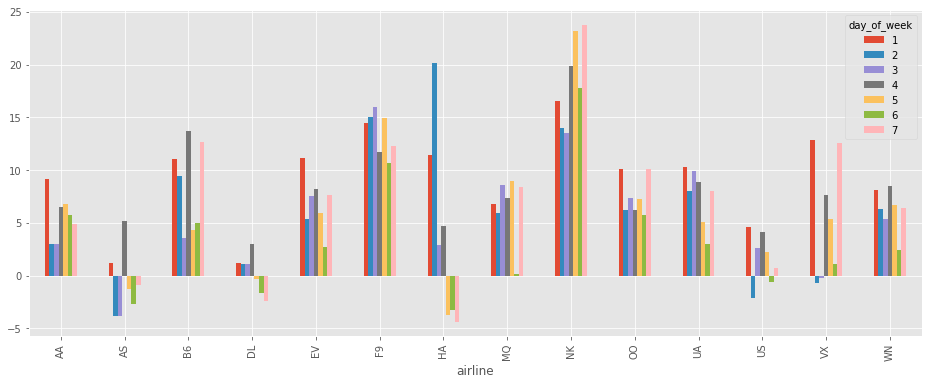

In [54]:
airline_weekday_delay.plot(kind='bar',figsize=(16,6))

# Extra

## Scatterplot color based on a column - (unfortunately more difficult than it needs to be)
It is possible to use the value of a different column to change colors of the points. If you have a numeric column, then this is easy. Here, we create a numeric column with random integers from 0 to 100. We also pass a color map to the `cmap` parameter.

In [42]:
dia_samp['some numeric col'] = np.random.randint(0, 100, len(dia_samp))

NameError: name 'dia_samp' is not defined

In [ ]:
dia_samp.plot(x='carat',
              y ='price',
              kind='scatter',
              title='Carat vs Price',
              c='some numeric col',
              cmap='plasma',
              figsize=(14, 6));

### Coloring with string columns - convert to 'category' data type
Working with strings isn't nearly as easy. One way to do this is to first convert the column to a Pandas category.

In [ ]:
dia_samp['clarity'] = dia_samp['clarity'].astype('category')

Let's verify the data types:

In [ ]:
dia_samp.dtypes

## The `cat` accessor
Pandas has a `cat` accessor for categorical columns. The `cat` accessor works just like `str` and `dt`. It gives you access to special categorical-only attributes and methods. One of these is `codes`. Each unique string is mapped to an integer.

In [41]:
clarity_codes = dia_samp['clarity'].cat.codes
clarity_codes.head()

NameError: name 'dia_samp' is not defined

In [ ]:
dia_samp.plot(x='carat',
              y ='price',
              kind='scatter',
              title='Carat vs Price',
              c=clarity_codes,
              cmap='plasma',
              figsize=(14, 6));

### Alternative method - Make a new column of string color values with the `map` Series method
The **`map`** Series method iterates over a column of data and returns a single value for each cell.  **`map`** can accept a function or a dictionary. If a dictionary is passed then a simple key lookup is used to return the value.

In [ ]:
dia_samp = diamonds.sample(frac=.1)
color_map = {'E': 'aqua',
             'I': 'green',
             'J': 'black',
             'H': 'cadetblue',
             'F': 'darksalmon',
             'G': 'lavender',
             'D': 'maroon'}

In [ ]:
dia_samp['color_map'] = dia_samp['color'].map(color_map).fillna('red')
dia_samp['color_map'].head()

Pass this Series to the **`c`** parameter.

In [ ]:
dia_samp.plot(x='carat',
              y ='price',
              kind='scatter',
              title='Carat vs Price',
              c=dia_samp['color_map'],
              figsize=(14, 6));